In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import warnings
from matplotlib.animation import FuncAnimation, PillowWriter
np.seterr(divide='ignore', invalid='ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning)


THEORETICAL DEMO: H(A) ≤ log(n)

 n = 2
theoretical max: log2(2) = 1.0000 bits
uniform [0.5 0.5]: H = 1.0000 bits
skewed [0.6 0.4]: H = 0.9710 bits
ok: uniform = max entropy, skewed < uniform

 n = 4
theoretical max: log2(4) = 2.0000 bits
uniform [0.25 0.25 0.25 0.25]: H = 2.0000 bits
skewed [0.6        0.13333333 0.13333333 0.13333333]: H = 1.6049 bits
ok: uniform = max entropy, skewed < uniform

 n = 6
theoretical max: log2(6) = 2.5850 bits
uniform [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]: H = 2.5850 bits
skewed [0.6  0.08 0.08 0.08 0.08 0.08]: H = 1.8997 bits
ok: uniform = max entropy, skewed < uniform

 n = 8
theoretical max: log2(8) = 3.0000 bits
uniform [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]: H = 3.0000 bits
skewed [0.6        0.05714286 0.05714286 0.05714286 0.05714286 0.05714286
 0.05714286 0.05714286]: H = 2.0939 bits
ok: uniform = max entropy, skewed < uniform

EMPIRICAL DEMO: sampling 5000 random dists (n=6)
dimension n = 6
theoretical m

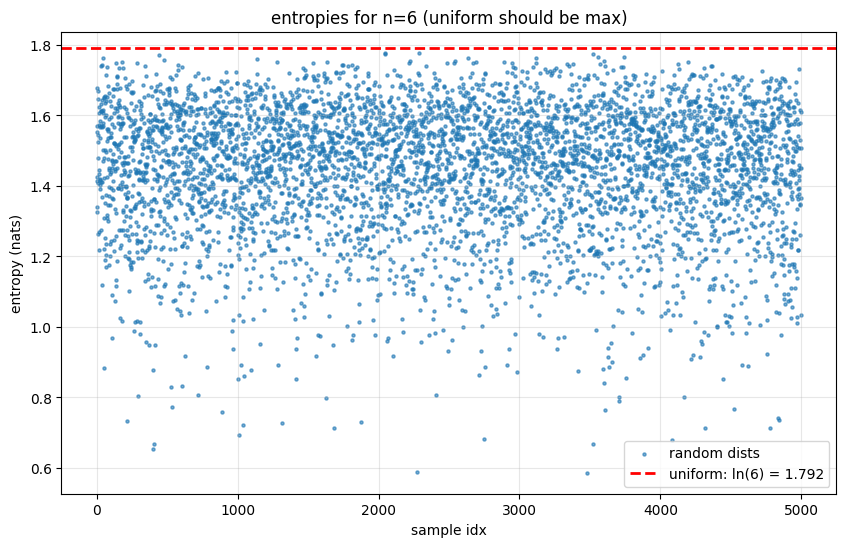


MATH NOTE: Jensen's inequality (concave f = -x log x)
since f is concave, f(average) >= average(f). that forces uniform to max entropy.
equality when all probs equal duh.

wrap-up: showed theory + samples. uniform = max entropy.
H(A) <= log(n); equality when all p_i = 1/n


In [26]:
def shannon_entropy(probabilities, base=2):
    #drop zero 0*log(0) is annoying
    non_zero_p = probabilities[probabilities > 0]

    if base == 2:
        return -np.sum(non_zero_p * np.log2(non_zero_p))
    else:  #ntrl ln
        return -np.sum(non_zero_p * np.log(non_zero_p))


def demonstrate_max_entropy_theorem():
    print("=" * 60)
    print("THEORETICAL DEMO: H(A) ≤ log(n)")
    print("=" * 60)

    #try for a few n's and ocmpare uniform v. biased
    for n in [2, 4, 6, 8]:
        #uni, max entropy
        P_uniform = np.ones(n) / n
        H_uniform = shannon_entropy(P_uniform)

        #arbt. skewed distro
        P_non_uniform = np.array([0.6] + [0.4/(n-1)] * (n-1))
        H_non_uniform = shannon_entropy(P_non_uniform)

        theoretical_max = np.log2(n)

        print(f"\n n = {n}")
        print(f"theoretical max: log2({n}) = {theoretical_max:.4f} bits")
        print(f"uniform {P_uniform}: H = {H_uniform:.4f} bits")
        print(f"skewed {P_non_uniform}: H = {H_non_uniform:.4f} bits")

        #quick checks if something weird happens
        assert np.isclose(H_uniform, theoretical_max), "uniform should hit log2(n)"
        assert H_non_uniform < H_uniform, "skewed should have less entropy"

        print("ok: uniform = max entropy, skewed < uniform")


def empirical_entropy_sampling(n=6, num_samples=5000):
    #draw random dists and show entropies
    print("\n" + "=" * 60)
    print(f"EMPIRICAL DEMO: sampling {num_samples} random dists (n={n})")
    print("=" * 60)

    rng = np.random.default_rng(0)

    #random prob vectors + norm expo
    X = rng.exponential(1.0, (num_samples, n))
    P = X / X.sum(axis=1, keepdims=True)

    #entropy natty plt ease
    Hs = [shannon_entropy(p, base=np.e) for p in P]  # nats
    H_uniform = shannon_entropy(np.ones(n)/n, base=np.e)
    theoretical_max_nats = np.log(n)

    print(f"dimension n = {n}")
    print(f"theoretical max (nats): ln({n}) = {theoretical_max_nats:.4f}")
    print(f"uniform entropy (nats): {H_uniform:.4f}")
    print(f"sample max: {max(Hs):.4f}, sample min: {min(Hs):.4f}")

    #show scatter for spread
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(Hs)), Hs, s=5, alpha=0.6, label='random dists')
    plt.axhline(H_uniform, color='red', linestyle='--', linewidth=2,
                label=f'uniform: ln({n}) = {H_uniform:.3f}')
    plt.xlabel('sample idx')
    plt.ylabel('entropy (nats)')
    plt.title(f'entropies for n={n} (uniform should be max)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return Hs, H_uniform


def jensens_inequality_demonstration():
    #concavity --> uniform wins
    print("\n" + "=" * 60)
    print("MATH NOTE: Jensen's inequality (concave f = -x log x)")
    print("=" * 60)

    print("since f is concave, f(average) >= average(f). that forces uniform to max entropy.")
    print("equality when all probs equal duh.")

def problem_1():
    demonstrate_max_entropy_theorem()
    empirical_entropy_sampling(n=6, num_samples=5000)
    jensens_inequality_demonstration()

    print("\n" + "=" * 60)
    print("wrap-up: showed theory + samples. uniform = max entropy.")
    print("H(A) <= log(n); equality when all p_i = 1/n")
    print("=" * 60)
problem_1()


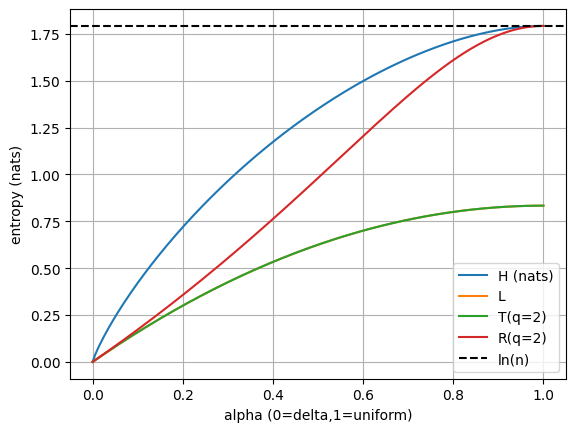

probabilities P = [0.6 0.3 0.1]
shannon entropy H_e: 0.89794572
q=0.999: T=0.89850684, R=0.89810342
q=0.9999: T=0.89800181, R=0.89796149
q=1.0001: T=0.89788965, R=0.89792996
q=1.001: T=0.89738522, R=0.89778811


In [27]:
#entropy functions (base e)
def H(p): 
    p = p[p>0]
    return -(p*np.log(p)).sum()

def L(p): 
    return (p*(1-p)).sum()

def T(p,q): 
    return (1-(p**q).sum())/(q-1)

def R(p,q): 
    return np.log((p**q).sum())/(1-q)

#plot entropies along delta→uniform path
n = 6
u = np.ones(n)/n
d = np.zeros(n); d[0] = 1
alph = np.linspace(0,1,201)

Hvals, Lvals, T2, R2 = [], [], [], []
for a in alph:
    p = (1-a)*d + a*u
    Hvals.append(H(p))
    Lvals.append(L(p))
    T2.append(T(p,2))
    R2.append(R(p,2))

plt.plot(alph,Hvals,label='H (nats)')
plt.plot(alph,Lvals,label='L')
plt.plot(alph,T2,label='T(q=2)')
plt.plot(alph,R2,label='R(q=2)')
#gridlines
plt.axhline(np.log(n),color='k',ls='--',label='ln(n)')
plt.grid(True)
plt.xlabel('alpha (0=delta,1=uniform)')
plt.ylabel('entropy (nats)')
plt.legend()
plt.show()

#limit check near q=1 for non-uniform distribution
P = np.array([0.6,0.3,0.1])
H_e = H(P)
qvals = [0.999,0.9999,1.0001,1.001]

print(f'probabilities P = {P}')
print(f'shannon entropy H_e: {H_e:.8f}')
for q in qvals:
    print(f'q={q}: T={T(P,q):.8f}, R={R(P,q):.8f}')

#sanity assert at q≈1
q_close = 1.000001
assert np.isclose(H_e, T(P,q_close))
assert np.isclose(H_e, R(P,q_close))

series near q=0:


-1 + 1/(q*log(q)/log(2) + (1 - q)*log(1 - q)/log(2) + 1)

R(0.1) exact:


log((10000000000/387420489)**(1/log(387420489/9765625)))

R(0.1) numeric:


0.8832235437732407

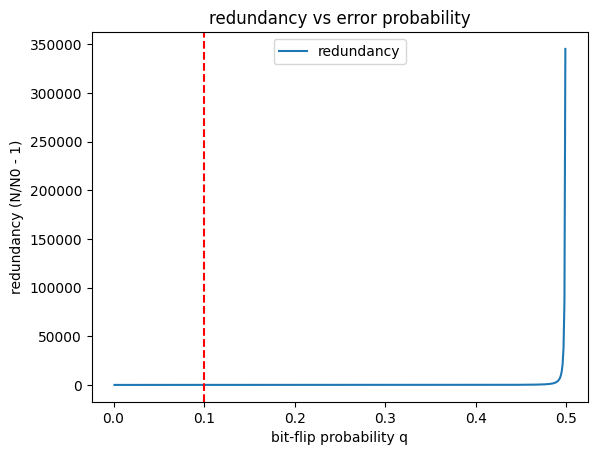

In [30]:
#p3
print('series near q=0:')
display(sp.series(Redund, q, 0, 4))

print('R(0.1) exact:')
display(sp.simplify(val_q01))
print('R(0.1) numeric:')
display(float(val_q01.evalf()))

def H2_np(x): return -(x*np.log2(x)+(1-x)*np.log2(1-x))
def R_np(x): return 1/(1-H2_np(x)) - 1

plt.plot(qgrid, R_np(qgrid), label='redundancy')
plt.axvline(0.1, linestyle='--', color='red')
plt.xlabel('bit-flip probability q')
plt.ylabel('redundancy (N/N0 - 1)')
plt.title('redundancy vs error probability')
plt.legend()
plt.savefig('redundancy_plot.png', dpi=300)
plt.show()


In [29]:
#make gif
#binary entropy + redundancy
def H2_np(x): return -(x*np.log2(x)+(1-x)*np.log2(1-x))
def R_np(x): return 1/(1-H2_np(x)) - 1

qgrid = np.linspace(0,0.5,500)
Rvals = R_np(qgrid)

fig, ax = plt.subplots()
ax.set_xlim(0,0.5)
ax.set_ylim(0,10)  #cap display
#add plt grid
ax.grid(True)
ax.set_xlabel('bit-flip probability q')
ax.set_ylabel('redundancy (N/N0 - 1)')
line, = ax.plot([],[], lw=2)

def init():
    line.set_data([],[])
    return line,

def update(frame):
    x = qgrid[:frame]
    y = Rvals[:frame]
    line.set_data(x,y)
    return line,

ani = FuncAnimation(fig, update, frames=len(qgrid), init_func=init,
                    blit=True, interval=30)

#save gif
ani.save('redundancy.gif', writer=PillowWriter(fps=30))
plt.close()
